#Hanan Fared Mohamed Omara   ID:20398559

## Import Libraries


In [101]:
#import libraries
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
sns.set()
pd.set_option('display.max_rows', None)

from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.metrics import classification_report, plot_confusion_matrix, accuracy_score,recall_score,precision_score, roc_curve, precision_recall_curve, roc_auc_score
from sklearn.model_selection import GridSearchCV

## Load dataset

In [ ]:
#load dataset
dataset = pd.read_csv('/content/data.csv',index_col=0)

In [ ]:
dataset.head(5)

,location,country,gender,age,vis_wuhan,from_wuhan,symptom1,symptom2,symptom3,symptom4,symptom5,symptom6,diff_sym_hos,result
0,104,8,1,66.0,1,0,14,31,19,12,3,1,8,1
1,101,8,0,56.0,0,1,14,31,19,12,3,1,0,0
2,137,8,1,46.0,0,1,14,31,19,12,3,1,13,0
3,116,8,0,60.0,1,0,14,31,19,12,3,1,0,0
4,116,8,1,58.0,0,0,14,31,19,12,3,1,0,0


In [ ]:
#select a specific row or column from the data set
X=dataset.iloc[:, :-1]
y=dataset.iloc[:,-1]

In [ ]:
X.shape

(863, 13)

In [ ]:
y.shape

(863,)

## Visualize the dataset

Text(0.5, 1.0, 'Correlation Matrix')

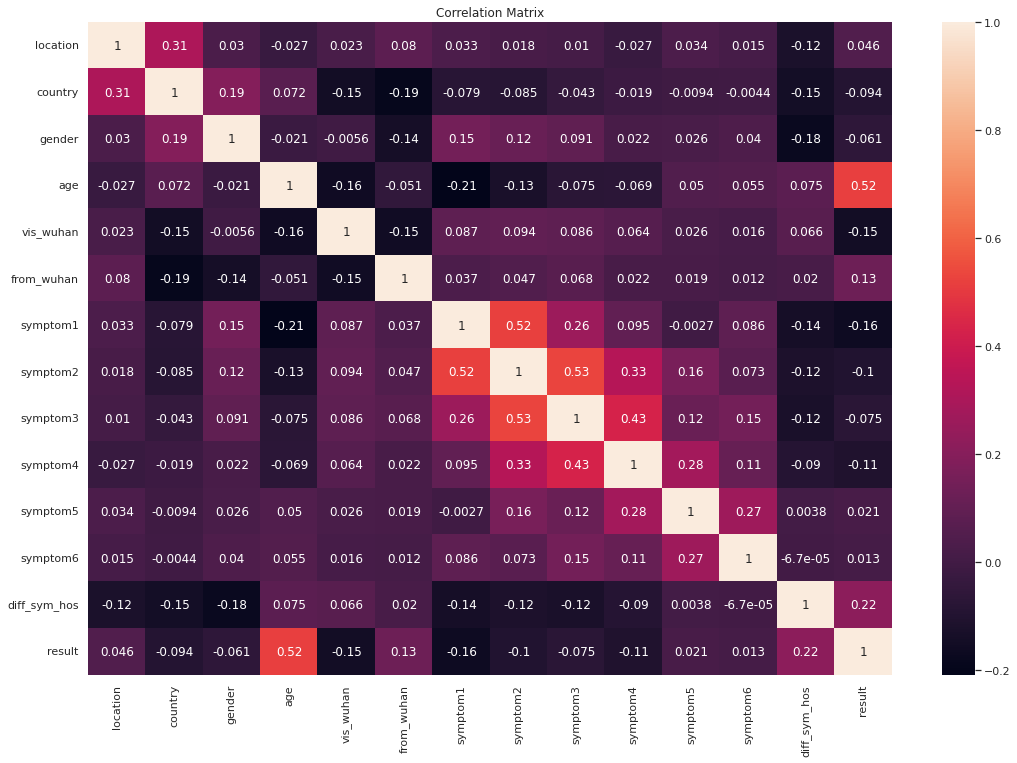

In [ ]:

plt.rcParams["figure.figsize"] = (18,12) # Custom figure size in inches
sns.heatmap(dataset.corr(), annot =True)
plt.title('Correlation Matrix')

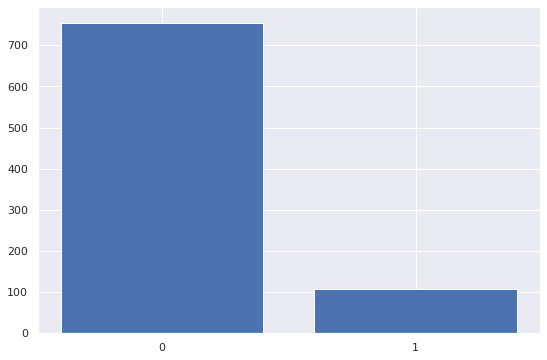

In [131]:
from pyparsing import results
results=dataset['result'].value_counts()
x = results.index
y = results.values

plt.figure(figsize=(9,6))
plt.bar(x,y)
plt.xticks(x)
plt.show()


Text(0.5, 1.0, 'Result vs Age')

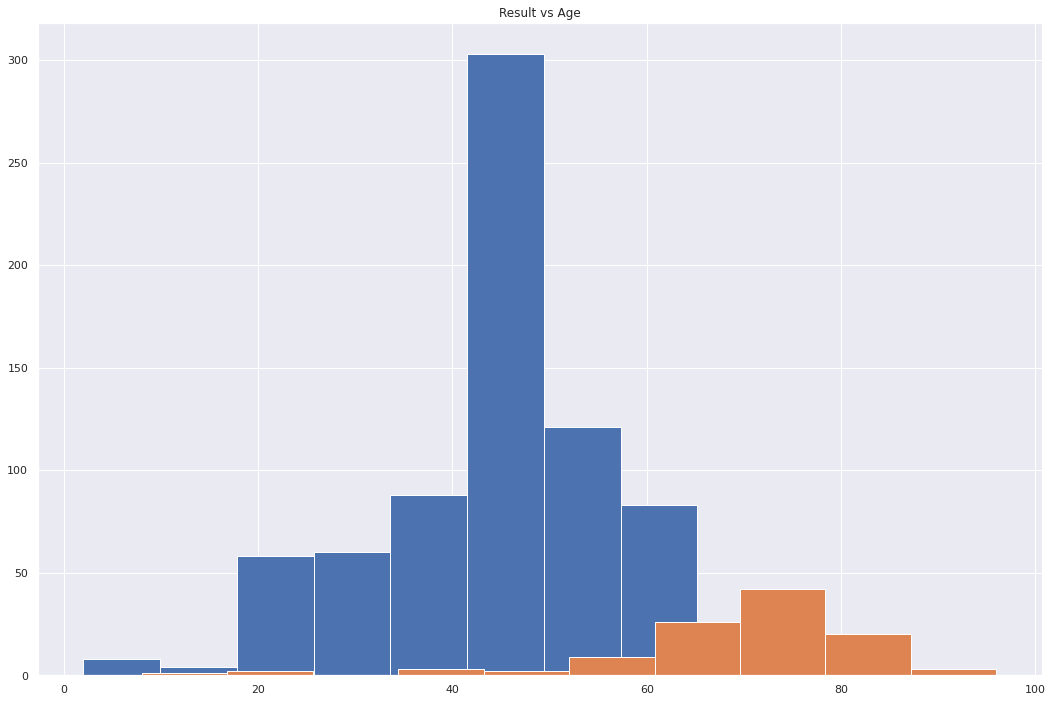

In [ ]:
dataset.groupby('result').age.hist();
plt.title('Result vs Age')

In [ ]:
features = np.array(dataset.columns)
features

array(['location', 'country', 'gender', 'age', 'vis_wuhan', 'from_wuhan',
       'symptom1', 'symptom2', 'symptom3', 'symptom4', 'symptom5',
       'symptom6', 'diff_sym_hos', 'result'], dtype=object)

In [ ]:
for col in range(len(features)):
    # Age features are numeric
    count = dataset[features[col]].unique() # printing unique values of each column
    print("Number of unique values in %s ="%features[col],len(count))

Number of unique values in location = 139
Number of unique values in country = 34
Number of unique values in gender = 3
Number of unique values in age = 81
Number of unique values in vis_wuhan = 2
Number of unique values in from_wuhan = 2
Number of unique values in symptom1 = 25
Number of unique values in symptom2 = 32
Number of unique values in symptom3 = 20
Number of unique values in symptom4 = 13
Number of unique values in symptom5 = 4
Number of unique values in symptom6 = 2
Number of unique values in diff_sym_hos = 18
Number of unique values in result = 2


## Splitting dataset

In [ ]:
# set aside 5% for testing
X_, X_test,y_, y_test = train_test_split(X, y,stratify =  y,test_size=0.05, shuffle = True, random_state = 8)

# set aside another 5% for vaidation

X_train, X_val, y_train, y_val = train_test_split(X_, y_,stratify=y_, test_size=0.05, random_state= 8) 

# y_train = y_train.values.reshape(-1,1);
y_val = y_val.values.reshape(-1,1);
y_test = y_test.values.reshape(-1,1);

print("X_train shape: {}".format(X_train.shape))
print("X_test shape: {}".format(X_test.shape))
print("X_val shape: {}".format(X_val.shape))
print()
print("y_train shape: {}".format(y_train.shape))
print("y_test shape: {}".format(y_test.shape))
print("y_val shape: {}".format(y_val.shape))

X_train shape: (778, 13)
X_test shape: (44, 13)
X_val shape: (41, 13)

y_train shape: (778,)
y_test shape: (44, 1)
y_val shape: (41, 1)


##KNN Model

In [ ]:
knn = KNeighborsClassifier(n_neighbors=5, metric='euclidean')
knn.fit(X_train, y_train)

KNeighborsClassifier(metric='euclidean')

In [ ]:
# Accuracy for training dataset
y_pred_train = knn.predict(X_train)
print('Accuracy: %.3f' % accuracy_score(y_train, y_pred_train))


Accuracy: 0.960


In [ ]:
y_pred_val = knn.predict(X_val)
y_pred_val

array([0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [132]:
cm=confusion_matrix(y_val, y_pred_val)
cm

array([[35,  1],
       [ 1,  4]])

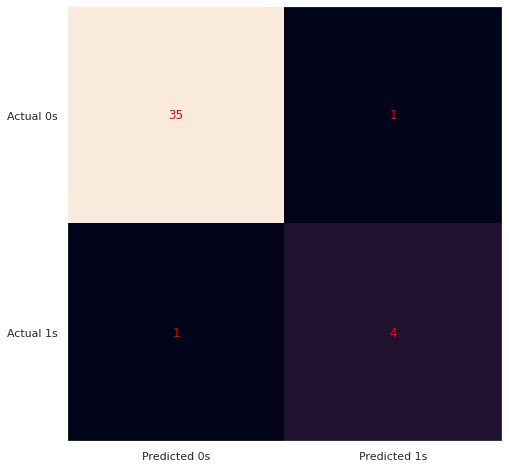

In [133]:
fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(cm)
ax.grid(False)
ax.xaxis.set(ticks=(0, 1), ticklabels=('Predicted 0s', 'Predicted 1s'))
ax.yaxis.set(ticks=(0, 1), ticklabels=('Actual 0s', 'Actual 1s'))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, cm[i, j], ha='center', va='center', color='red')
plt.show()

In [ ]:
print('Precision: %.3f' % precision_score(y_val, y_pred_val))
print('Recall: %.3f' % recall_score(y_val, y_pred_val))
print('Accuracy: %.3f' % accuracy_score(y_val, y_pred_val))
print('F1 Score: %.3f' % f1_score(y_val, y_pred_val))

Precision: 0.800
Recall: 0.800
Accuracy: 0.951
F1 Score: 0.800


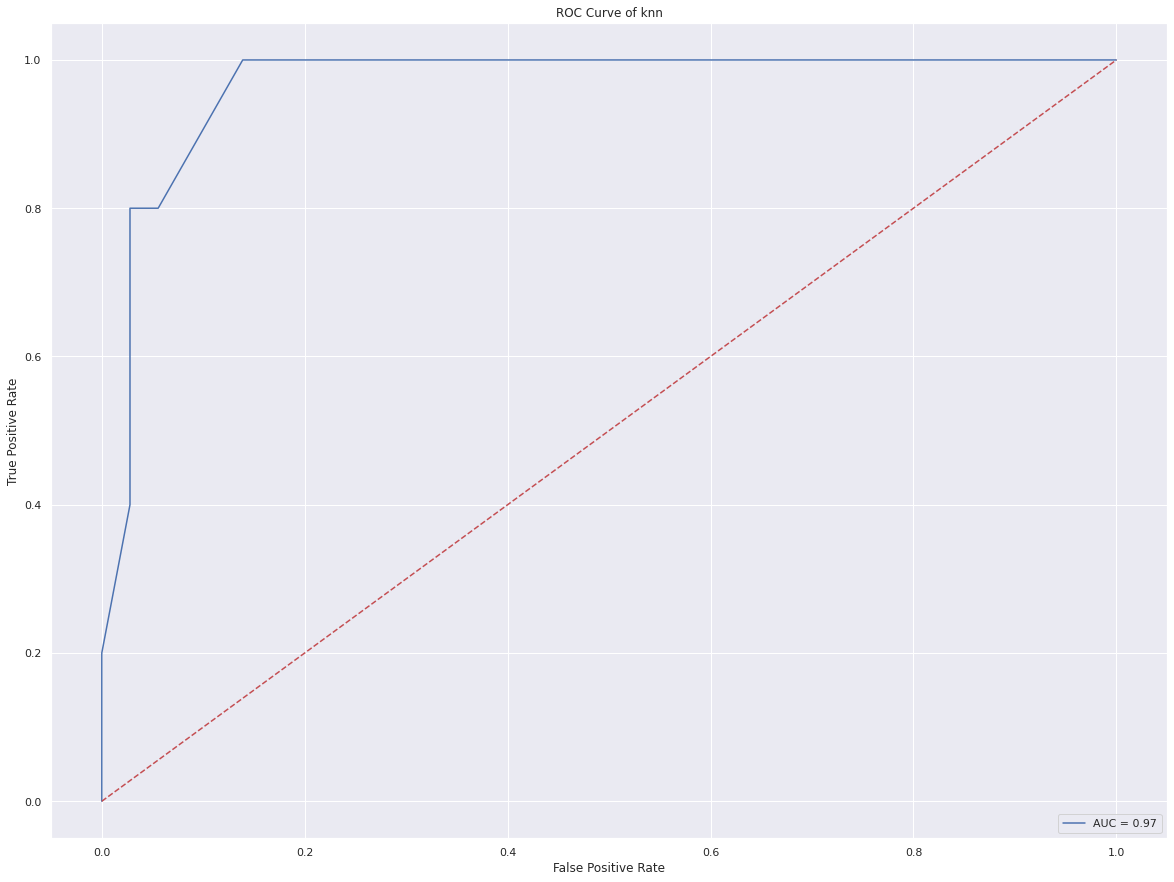

In [138]:
y_scores = knn.predict_proba(X_val)
fpr, tpr, threshold = roc_curve(y_val, y_scores[:, 1])
roc_auc = auc(fpr, tpr)

plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('ROC Curve of knn')
plt.show()

 
##Logistic Regression Model


In [ ]:
LR_Model = LogisticRegression(solver='liblinear', random_state=0)

In [ ]:
LR_Model.fit(X_train, y_train)

LogisticRegression(random_state=0, solver='liblinear')

In [ ]:
#get the value of the slope 𝑏₁ and the intercept 𝑏₀ of the linear function 𝑓 
LR_Model.intercept_

array([-1.4736675])

In [ ]:
LR_Model.coef_

array([[ 0.01646322, -0.13756284,  0.87240587,  0.2077452 , -1.83838038,
         1.03769935, -0.06547394,  0.04218315, -0.08798267, -0.27562392,
        -2.32160246, -1.46411161,  0.19668165]])

In [ ]:
print("Training Accurcy: ", LR_Model.score(X_train, y_train))
print("Validation Accurcy: ", LR_Model.score(X_val, y_val))

Training Accurcy:  0.9524421593830334
Validation Accurcy:  0.9512195121951219


In [ ]:
LR_y_prd_val = LR_Model.predict(X_val)
LR_y_prd_val

array([0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [ ]:
cm = confusion_matrix(y_val, LR_y_prd_val)
cm

array([[35,  1],
       [ 1,  4]])

In [134]:
print('Precision: %.3f' % precision_score(y_val, LR_y_prd_val))
print('Recall: %.3f' % recall_score(y_val, LR_y_prd_val))
print('Accuracy: %.3f' % accuracy_score(y_val, LR_y_prd_val))
print('F1 Score: %.3f' % f1_score(y_val, LR_y_prd_val))

Precision: 0.800
Recall: 0.800
Accuracy: 0.951
F1 Score: 0.800


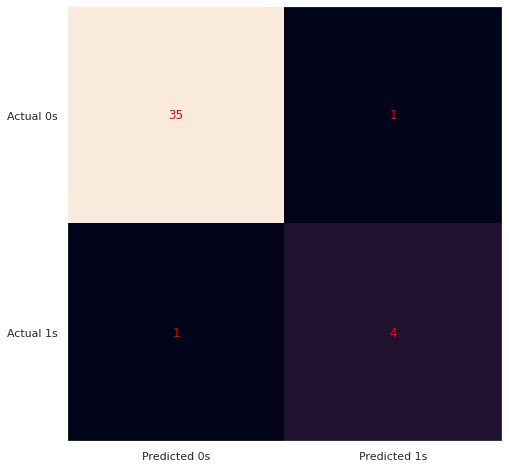

In [ ]:
fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(cm)
ax.grid(False)
ax.xaxis.set(ticks=(0, 1), ticklabels=('Predicted 0s', 'Predicted 1s'))
ax.yaxis.set(ticks=(0, 1), ticklabels=('Actual 0s', 'Actual 1s'))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, cm[i, j], ha='center', va='center', color='red')
plt.show()

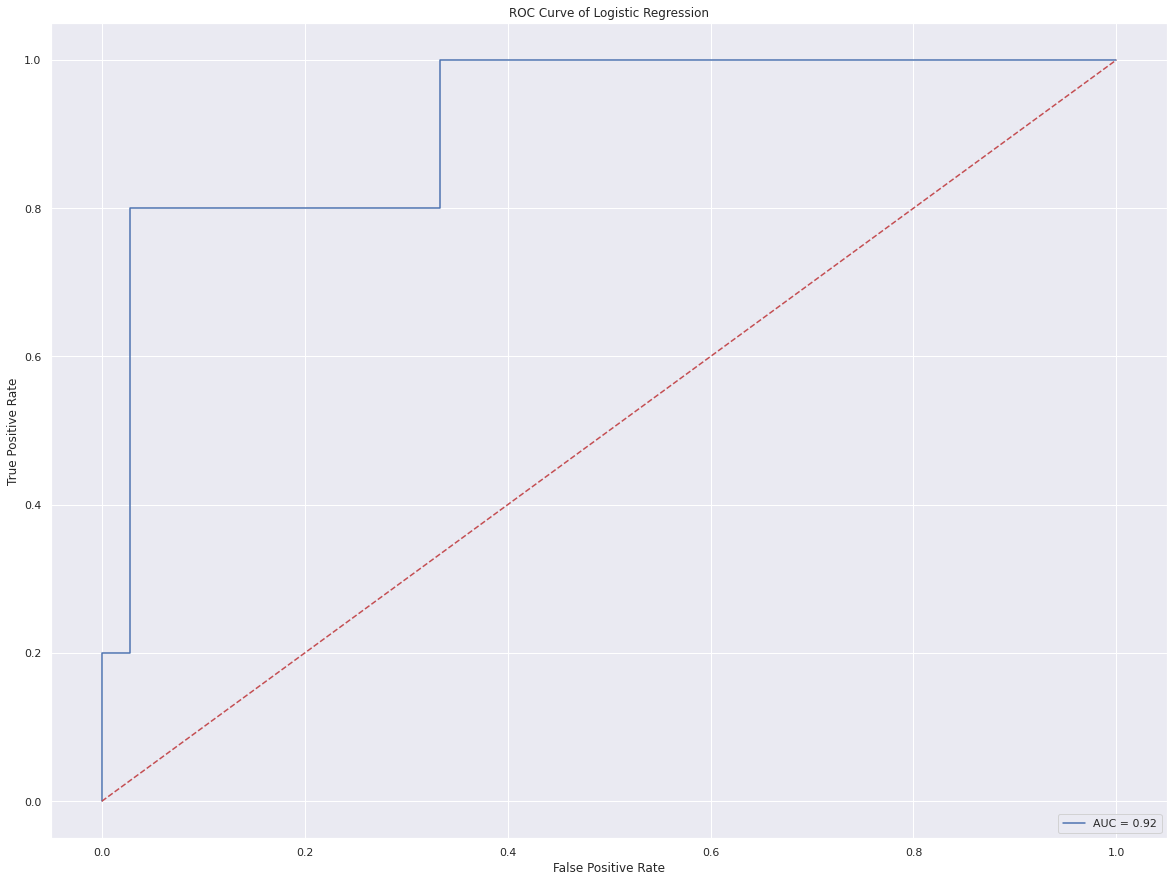

In [137]:
y_scores = LR_Model.predict_proba(X_val)
fpr, tpr, threshold = roc_curve(y_val, y_scores[:, 1])
roc_auc = auc(fpr, tpr)

plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('ROC Curve of Logistic Regression')
plt.show()

##SVM Model

In [ ]:
from sklearn.svm import SVC

# defining parameter range
param_grid = {'C': [ 100, 1000], 
              'gamma': [1, 0.1, 0.01],
              'kernel': ['linear']} 
  
svm_model = GridSearchCV(SVC( probability= True), param_grid, refit = True, verbose = 3)

In [ ]:
# fitting the model for grid search
svm_model.fit(X_train, y_train)

Fitting 5 folds for each of 6 candidates, totalling 30 fits
[CV 1/5] END .....C=100, gamma=1, kernel=linear;, score=0.962 total time= 2.0min
[CV 2/5] END .....C=100, gamma=1, kernel=linear;, score=0.968 total time= 1.2min
[CV 3/5] END .....C=100, gamma=1, kernel=linear;, score=0.936 total time= 1.3min
[CV 4/5] END .....C=100, gamma=1, kernel=linear;, score=0.955 total time= 1.2min
[CV 5/5] END .....C=100, gamma=1, kernel=linear;, score=0.948 total time=  29.9s
[CV 1/5] END ...C=100, gamma=0.1, kernel=linear;, score=0.962 total time= 1.6min
[CV 2/5] END ...C=100, gamma=0.1, kernel=linear;, score=0.968 total time= 1.8min
[CV 3/5] END ...C=100, gamma=0.1, kernel=linear;, score=0.936 total time= 1.5min
[CV 4/5] END ...C=100, gamma=0.1, kernel=linear;, score=0.955 total time= 1.2min
[CV 5/5] END ...C=100, gamma=0.1, kernel=linear;, score=0.948 total time=  18.3s
[CV 1/5] END ..C=100, gamma=0.01, kernel=linear;, score=0.962 total time= 1.4min
[CV 2/5] END ..C=100, gamma=0.01, kernel=linear;,

GridSearchCV(estimator=SVC(probability=True),
             param_grid={'C': [100, 1000], 'gamma': [1, 0.1, 0.01],
                         'kernel': ['linear']},
             verbose=3)

In [ ]:
svm_best_model=svm_model.best_estimator_
svm_best_model

SVC(C=100, gamma=1, kernel='linear', probability=True)

In [ ]:
print("Training Accurcy: ", svm_best_model.score(X_train, y_train))
print("Validation Accurcy: ", svm_best_model.score(X_val, y_val))

Training Accurcy:  0.961439588688946
Validation Accurcy:  0.9512195121951219


In [ ]:
svm_y_prd_val = svm_best_model.predict(X_val)
cm = confusion_matrix(y_val, svm_y_prd_val)
cm

array([[36,  0],
       [ 2,  3]])

In [ ]:
print('Precision: %.3f' % precision_score(y_val, svm_y_prd_val))
print('Recall: %.3f' % recall_score(y_val, svm_y_prd_val))
print('Accuracy: %.3f' % accuracy_score(y_val, svm_y_prd_val))
print('F1 Score: %.3f' % f1_score(y_val, svm_y_prd_val))

Precision: 1.000
Recall: 0.600
Accuracy: 0.951
F1 Score: 0.750


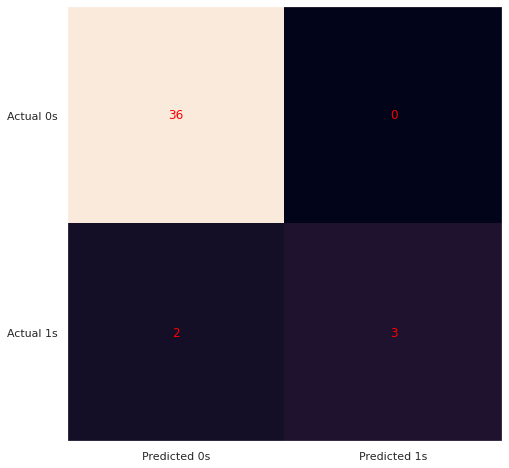

In [ ]:
fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(cm)
ax.grid(False)
ax.xaxis.set(ticks=(0, 1), ticklabels=('Predicted 0s', 'Predicted 1s'))
ax.yaxis.set(ticks=(0, 1), ticklabels=('Actual 0s', 'Actual 1s'))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, cm[i, j], ha='center', va='center', color='red')
plt.show()

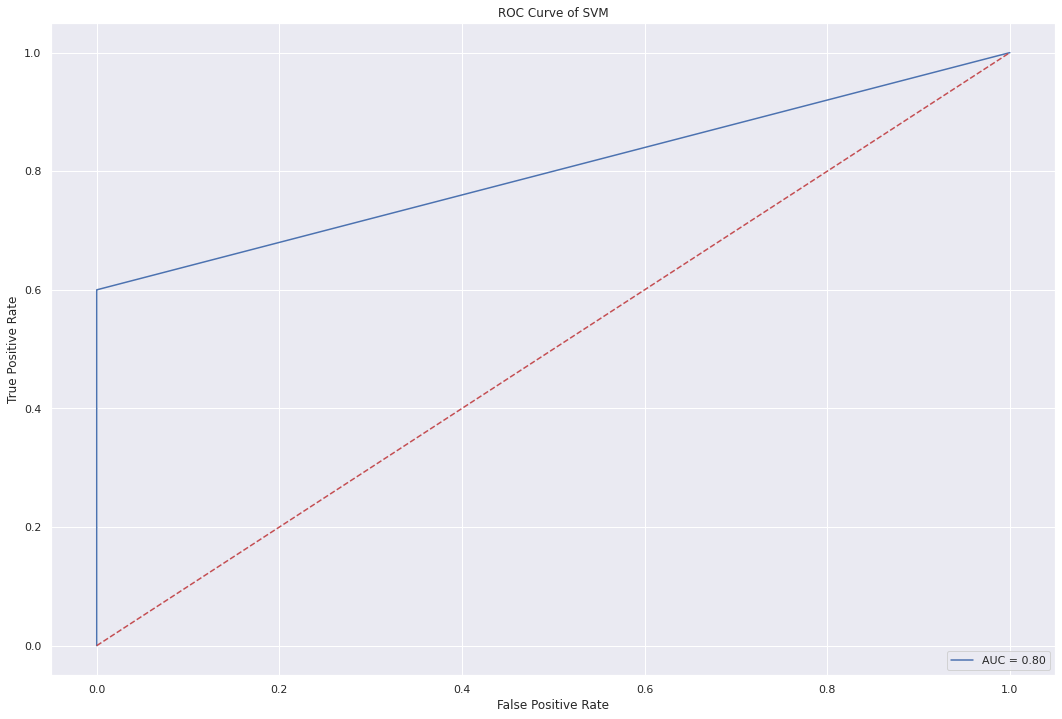

In [ ]:
fpr, tpr, threshold = roc_curve(y_val, svm_y_prd_val)
roc_auc = auc(fpr, tpr)

plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('ROC Curve of SVM')
plt.show()

In [ ]:
print(classification_report(y_val, svm_y_prd_val))

              precision    recall  f1-score   support

           0       0.95      1.00      0.97        36
           1       1.00      0.60      0.75         5

    accuracy                           0.95        41
   macro avg       0.97      0.80      0.86        41
weighted avg       0.95      0.95      0.95        41



## Naive Bayes Model

In [ ]:
param_grid_nb = {
    'var_smoothing': np.logspace(0,-9, num=300)
}

nb_model = GridSearchCV(GaussianNB(), param_grid_nb, refit = True, verbose = 3)

In [ ]:
nb_model.fit(X_train, y_train)

Fitting 5 folds for each of 300 candidates, totalling 1500 fits
[CV 1/5] END .................var_smoothing=1.0;, score=0.878 total time=   0.0s
[CV 2/5] END .................var_smoothing=1.0;, score=0.872 total time=   0.0s
[CV 3/5] END .................var_smoothing=1.0;, score=0.872 total time=   0.0s
[CV 4/5] END .................var_smoothing=1.0;, score=0.877 total time=   0.0s
[CV 5/5] END .................var_smoothing=1.0;, score=0.877 total time=   0.0s
[CV 1/5] END ..var_smoothing=0.9330387172620365;, score=0.878 total time=   0.0s
[CV 2/5] END ..var_smoothing=0.9330387172620365;, score=0.872 total time=   0.0s
[CV 3/5] END ..var_smoothing=0.9330387172620365;, score=0.872 total time=   0.0s
[CV 4/5] END ..var_smoothing=0.9330387172620365;, score=0.877 total time=   0.0s
[CV 5/5] END ..var_smoothing=0.9330387172620365;, score=0.877 total time=   0.0s
[CV 1/5] END ..var_smoothing=0.8705612479099865;, score=0.878 total time=   0.0s
[CV 2/5] END ..var_smoothing=0.87056124790998

GridSearchCV(estimator=GaussianNB(),
             param_grid={'var_smoothing': array([1.00000000e+00, 9.33038717e-01, 8.70561248e-01, 8.12267350e-01,
       7.57876886e-01, 7.07128478e-01, 6.59778248e-01, 6.15598650e-01,
       5.74377375e-01, 5.35916329e-01, 5.00030684e-01, 4.66547988e-01,
       4.35307336e-01, 4.06158599e-01, 3.78961698e-01, 3.53585937e-01,
       3.29909369e-01, 3.07818214e-01, 2.8720631...
       4.92388263e-09, 4.59417313e-09, 4.28654141e-09, 3.99950910e-09,
       3.73169684e-09, 3.48181763e-09, 3.24867066e-09, 3.03113550e-09,
       2.82816678e-09, 2.63878910e-09, 2.46209240e-09, 2.29722754e-09,
       2.14340223e-09, 1.99987727e-09, 1.86596292e-09, 1.74101565e-09,
       1.62443501e-09, 1.51566076e-09, 1.41417017e-09, 1.31947552e-09,
       1.23112175e-09, 1.14868426e-09, 1.07176689e-09, 1.00000000e-09])},
             verbose=3)

In [ ]:
NB_best_model = nb_model.best_estimator_
NB_best_model

GaussianNB(var_smoothing=0.03590739891061055)

In [ ]:
print("Training Accurcy: ", NB_best_model.score(X_train, y_train))
print("Validation Accurcy: ", NB_best_model.score(X_val, y_val))

Training Accurcy:  0.9177377892030848
Validation Accurcy:  0.8780487804878049


In [ ]:
nb_y_prd_val = NB_best_model.predict(X_val)
cm = confusion_matrix(y_val, nb_y_prd_val)
cm

array([[35,  1],
       [ 4,  1]])

In [ ]:
print('Precision: %.3f' % precision_score(y_val, nb_y_prd_val))
print('Recall: %.3f' % recall_score(y_val, nb_y_prd_val))
print('Accuracy: %.3f' % accuracy_score(y_val, nb_y_prd_val))
print('F1 Score: %.3f' % f1_score(y_val, nb_y_prd_val))

Precision: 0.500
Recall: 0.200
Accuracy: 0.878
F1 Score: 0.286


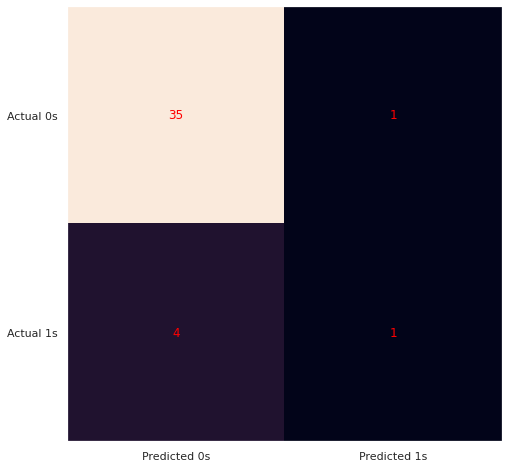

In [ ]:
fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(cm)
ax.grid(False)
ax.xaxis.set(ticks=(0, 1), ticklabels=('Predicted 0s', 'Predicted 1s'))
ax.yaxis.set(ticks=(0, 1), ticklabels=('Actual 0s', 'Actual 1s'))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, cm[i, j], ha='center', va='center', color='red')
plt.show()

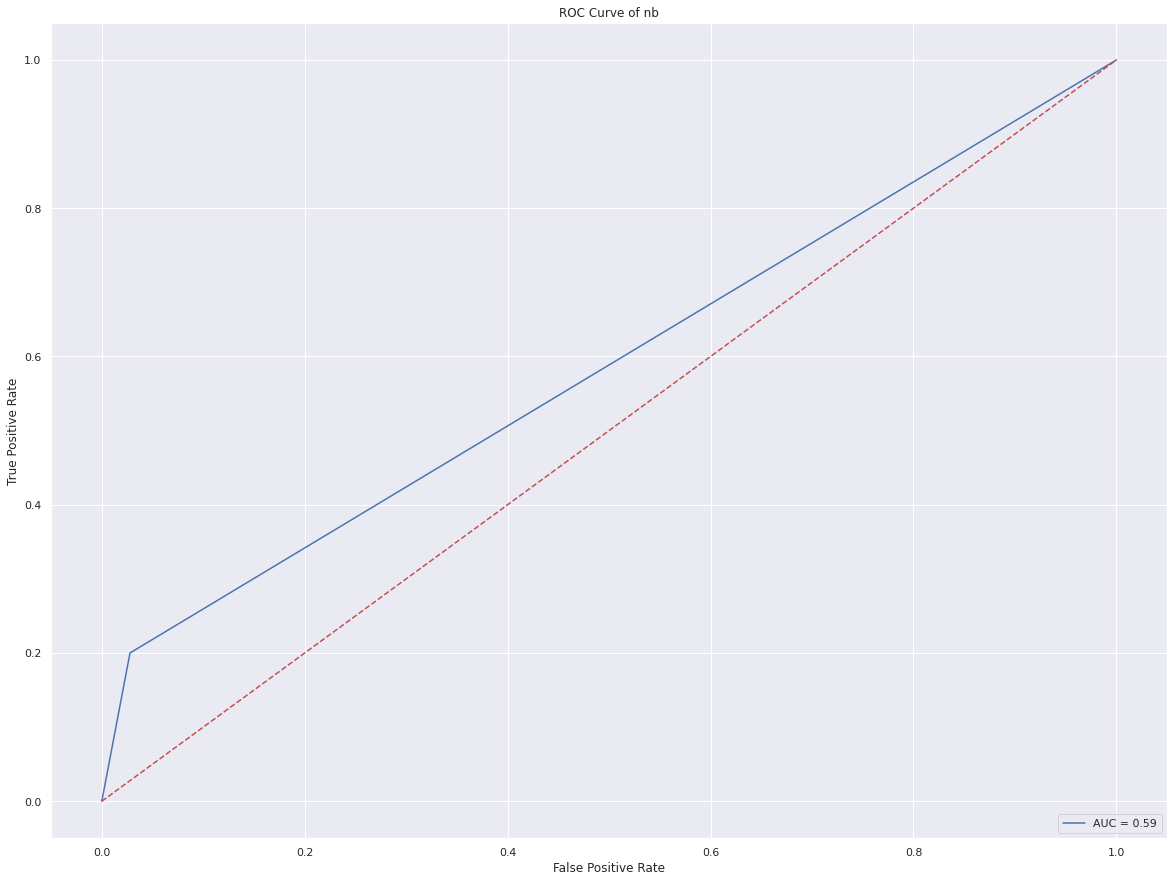

In [135]:
fpr, tpr, threshold = roc_curve(y_val, nb_y_prd_val)
roc_auc = auc(fpr, tpr)

plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('ROC Curve of nb')
plt.show()

In [ ]:
print(classification_report(y_val, nb_y_prd_val))

              precision    recall  f1-score   support

           0       0.90      0.97      0.93        36
           1       0.50      0.20      0.29         5

    accuracy                           0.88        41
   macro avg       0.70      0.59      0.61        41
weighted avg       0.85      0.88      0.85        41



##Decision Tree Model



In [ ]:
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn import tree

In [83]:

dec_tree = tree.DecisionTreeClassifier()

tree_param = {'criterion':['gini','entropy'],'max_depth':[4,5,6,7,8,9,10,11,12,15,20,30,40,50,70,90,120,150]}
dt_model = GridSearchCV(dec_tree , tree_param)


In [84]:
dt_model.fit(X_train, y_train)

GridSearchCV(estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [4, 5, 6, 7, 8, 9, 10, 11, 12, 15, 20, 30,
                                       40, 50, 70, 90, 120, 150]})

In [85]:
dt_best_model = dt_model.best_estimator_
dt_best_model

DecisionTreeClassifier(max_depth=11)

In [86]:
print("Training Accurcy: ", dt_best_model.score(X_train, y_train))
print("Validation Accurcy: ", dt_best_model.score(X_val, y_val))

Training Accurcy:  1.0
Validation Accurcy:  0.975609756097561


In [88]:
dt_y_prd_val = dt_best_model.predict(X_val)
cm = confusion_matrix(y_val, dt_y_prd_val)
cm

array([[36,  0],
       [ 1,  4]])

In [90]:
print('Precision: %.3f' % precision_score(y_val, dt_y_prd_val))
print('Recall: %.3f' % recall_score(y_val, dt_y_prd_val))
print('Accuracy: %.3f' % accuracy_score(y_val, dt_y_prd_val))
print('F1 Score: %.3f' % f1_score(y_val, dt_y_prd_val))

Precision: 1.000
Recall: 0.800
Accuracy: 0.976
F1 Score: 0.889


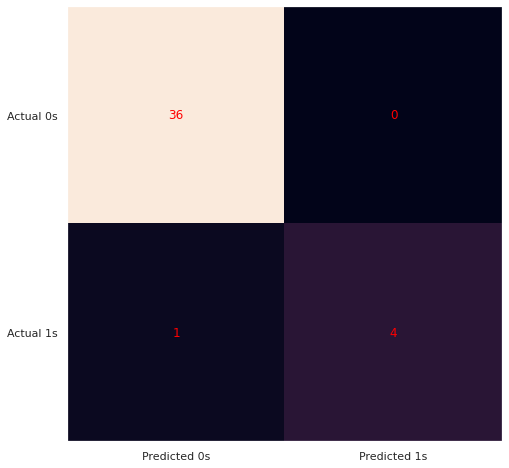

In [89]:
fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(cm)
ax.grid(False)
ax.xaxis.set(ticks=(0, 1), ticklabels=('Predicted 0s', 'Predicted 1s'))
ax.yaxis.set(ticks=(0, 1), ticklabels=('Actual 0s', 'Actual 1s'))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, cm[i, j], ha='center', va='center', color='red')
plt.show()

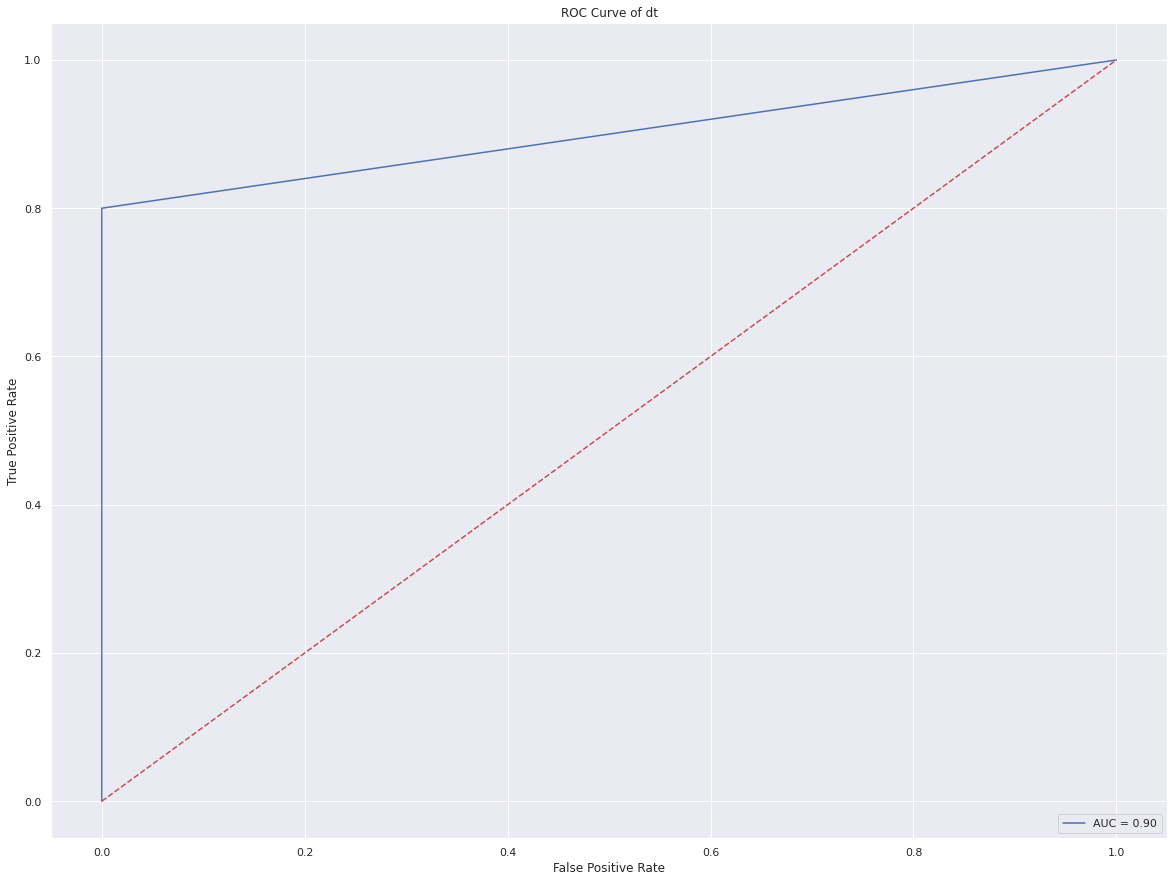

In [136]:
fpr, tpr, threshold = roc_curve(y_val, dt_y_prd_val)
roc_auc = auc(fpr, tpr)

plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('ROC Curve of dt')
plt.show()

In [92]:
print(classification_report(y_val, dt_y_prd_val))

              precision    recall  f1-score   support

           0       0.97      1.00      0.99        36
           1       1.00      0.80      0.89         5

    accuracy                           0.98        41
   macro avg       0.99      0.90      0.94        41
weighted avg       0.98      0.98      0.97        41



## Final Results 

As demonstrated above, the decision tree is the best model that fit the dataset.
So, we gonna test the best model in the DT model 

In [93]:
dt_y_prd_test = dt_best_model.predict(X_test)
cm = confusion_matrix(y_test, dt_y_prd_test)
cm

array([[37,  1],
       [ 1,  5]])

In [99]:
print("The Final Results on the test set (hold out set)")
print()
print('Precision: %.3f' % precision_score(y_test, dt_y_prd_test))
print('Recall: %.3f' % recall_score(y_test, dt_y_prd_test))
print('Accuracy: %.3f' % accuracy_score(y_test, dt_y_prd_test))
print('F1 Score: %.3f' % f1_score(y_test, dt_y_prd_test))

The Final Results on the test set (hold out set)

Precision: 0.833
Recall: 0.833
Accuracy: 0.955
F1 Score: 0.833


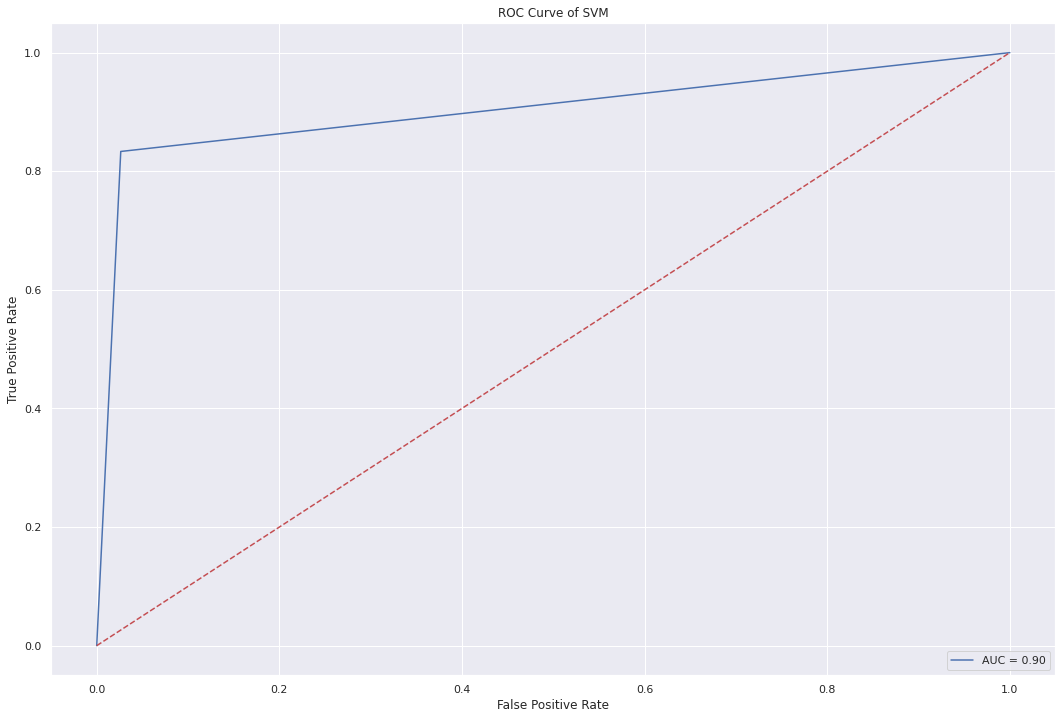

In [100]:
fpr, tpr, threshold = roc_curve(y_test, dt_y_prd_test)
roc_auc = auc(fpr, tpr)

plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('ROC Curve of SVM')
plt.show()